In [22]:
import numpy as np
import os
import os.path
import cv2
import scipy.io as sio
import matplotlib.pyplot as plt

In [23]:
Pic = sio.loadmat('VSM.mat')

In [24]:
data = Pic["data"]
name = Pic["name"]
target = Pic["target"]

In [25]:
print(data)
print(name)
print(target)

[[ 582    0 4648 ... 3567    0   60]
 [ 300    0 1040 ...   60    0    3]
 [ 689    0  561 ...  199    0  159]
 ...
 [1442    0   11 ...    0    0    0]
 [3679    0 2277 ...  669    0    0]
 [ 154    0  642 ...    0    0    0]]
['bird_001.jpg     ' 'bird_002.jpg     ' 'bird_003.jpg     '
 'bird_004.jpg     ' 'bird_005.jpg     ' 'bird_006.jpg     '
 'bird_007.jpg     ' 'bird_008.jpg     ' 'bird_009.jpg     '
 'bird_010.jpg     ' 'bird_011.jpg     ' 'bird_012.jpg     '
 'bird_013.jpg     ' 'bird_014.jpg     ' 'bird_015.jpg     '
 'bird_016.jpg     ' 'bird_017.jpg     ' 'bird_018.jpg     '
 'bird_019.jpg     ' 'bird_020.jpg     ' 'bird_021.jpg     '
 'bird_022.jpg     ' 'bird_023.jpg     ' 'bird_024.jpg     '
 'bird_025.jpg     ' 'bird_026.jpg     ' 'bird_027.jpg     '
 'bird_028.jpg     ' 'bird_029.jpg     ' 'bird_030.jpg     '
 'bird_031.jpg     ' 'bird_032.jpg     ' 'bird_033.jpg     '
 'bird_034.jpg     ' 'bird_035.jpg     ' 'bird_036.jpg     '
 'bird_037.jpg     ' 'bird_038.jpg     '

In [26]:
#处理语义名字
def spilt_name(name):
    """
    输入参数形式：'bird_056.jpg
    返回：bird
    """
    L = [x.split("_")[0] for x in name]
    return L

In [27]:
def unique(name):
    L = spilt_name(name)
    unique = np.unique(L)
    return unique

In [28]:
#def map_name(U):

In [29]:
def unique_to_num(name):
    L = spilt_name(name)
    U = unique(name)
    target = []
    for n in L:
        if n == U[0]:
            target.append(0)
        if n == U[1]:
            target.append(1)
        if n == U[2]:
            target.append(2)
        if n == U[3]:
            target.append(3)
        if n == U[4]:
            target.append(4)
        if n == U[5]:
            target.append(5)
        if n == U[6]:
            target.append(6)
        if n == U[7]:
            target.append(7)
        if n == U[8]:
            target.append(8)
        if n == U[9]:
            target.append(9)
    return np.array(target)

In [30]:
img = cv2.imread('ImgDB/bird_002.jpg')
# cv2.imshow('image',img)
# # 等待时间，毫秒级，0表示任意键终止
# cv2.waitKey(0)
# cv2.destroyAllWindows()

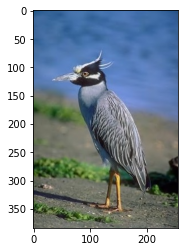

In [31]:
img_plt = img.copy()
img_plt[:,:,0] = img[:,:,2]
img_plt[:,:,1] = img[:,:,1]
img_plt[:,:,2] = img[:,:,0]
plt.imshow(img_plt)

In [32]:
def showimg(path):
    img = cv2.imread(path)
    img_plt = img.copy()
    img_plt[:,:,0] = img[:,:,2]
    img_plt[:,:,1] = img[:,:,1]
    img_plt[:,:,2] = img[:,:,0]
    plt.imshow(img_plt)


(<matplotlib.axes._subplots.AxesSubplot at 0x1336cb80b20>, None)

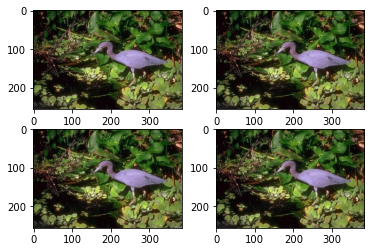

In [33]:
plt.subplot(2,2,1),showimg('ImgDB/bird_003.jpg')
plt.subplot(2,2,2),showimg('ImgDB/bird_003.jpg')
plt.subplot(2,2,3),showimg('ImgDB/bird_003.jpg')
plt.subplot(2,2,4),showimg('ImgDB/bird_003.jpg')

In [34]:
def cos_dist(vec1,vec2):
    """
    :param vec1: 向量1
    :param vec2: 向量2
    :return: 返回两个向量的余弦相似度
    """
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    dist1=float(np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))
    return dist1

In [35]:
searchindex = 666
def dist():
    img = data[searchindex,:]
    distance = []
    for v in data :
        d = cos_dist(img,v)
        distance.append(d)
    print("距离计算完毕")
    distance = np.array(distance)
    return distance

In [36]:
distance = dist()
np.argsort(-distance)


距离计算完毕


array([666, 616, 682, 602,  24, 678, 673, 609, 662, 624,  13, 290, 633,
       259, 680, 607, 298, 339, 604, 648,  46, 618, 657, 639, 608, 661,
       619, 672,  79,  74, 646, 375, 683, 626, 346, 191, 306, 785, 614,
       690, 629, 649, 620, 655, 336, 643, 603, 372, 647, 617, 202, 239,
        23,   1, 699, 381, 651, 601, 632,  81,  68, 986, 380,  19, 636,
        77, 872, 782, 631, 605, 621, 642, 365, 641, 282, 694, 297, 627,
       600,  83, 291, 226, 675, 696, 283, 612, 732,  43, 686,  72, 665,
       664, 638, 999, 369, 363,  16, 159, 329, 792, 399, 650, 667, 787,
       656, 304,  94, 630, 695, 900, 350, 287, 613, 289, 318, 213, 293,
       207, 270, 708, 386, 273, 977, 946, 295, 954, 738, 314, 931, 712,
       611, 652, 256, 770, 635, 247, 610, 634, 744, 312, 332,   6, 349,
       294, 252, 990, 689, 130, 163, 684, 240, 288, 922,  80, 685, 623,
       236, 919, 128, 103, 335, 920, 319, 200, 697, 862, 373, 337, 208,
       356, 227, 338, 214,  37, 279, 845, 175,  12, 343, 285, 28

In [37]:
def six_img():
    distance = dist()
    index = np.argsort(-distance)[:9]
    return name[index]

In [38]:
six_img()

距离计算完毕


array(['jokul_067.jpg    ', 'jokul_017.jpg    ', 'jokul_083.jpg    ',
       'jokul_003.jpg    ', 'bird_025.jpg     ', 'jokul_079.jpg    ',
       'jokul_074.jpg    ', 'jokul_010.jpg    ', 'jokul_063.jpg    '],
      dtype='<U17')

In [39]:
def showsiximgs():
    top_size,bottom_size,left_size,right_size = (50,50,50,50)
    constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=255)

    siximgs = six_img()
    plt.subplot(3,3,1)
    showimg("ImgDB/"+name[searchindex])
    plt.title("SERCH")

    for i in range(8):
        plt.subplot(3,3,i+2)
        showimg('ImgDB/' + siximgs[i])
        plt.title(siximgs[i])

距离计算完毕


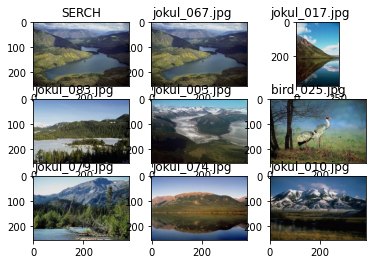

In [40]:
showsiximgs()


In [41]:
img_gray_data = cv2.imread("ImgDB/bird_001.jpg", cv2.IMREAD_GRAYSCALE)
hist, bins = np.histogram(img_gray_data.ravel(), bins=50)
print(hist)
print(bins)


[ 2822 18983  8079  6019  5287  4982  4753  5023  4698  4581  4773  3337
  2788  2333  1950  1753  1615  1395  1238  1112  1282  1052   946   927
   811   732   633   532   472   410   387   261   255   253   195   182
   186   162   134   105   148   141   111   141   145   110    50    14
     5     1]
[  0.    5.1  10.2  15.3  20.4  25.5  30.6  35.7  40.8  45.9  51.   56.1
  61.2  66.3  71.4  76.5  81.6  86.7  91.8  96.9 102.  107.1 112.2 117.3
 122.4 127.5 132.6 137.7 142.8 147.9 153.  158.1 163.2 168.3 173.4 178.5
 183.6 188.7 193.8 198.9 204.  209.1 214.2 219.3 224.4 229.5 234.6 239.7
 244.8 249.9 255. ]


In [42]:
help(np.histogram)


Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
      